In [3]:
import numpy as np
import pandas as pd
import visuals as vs
from sklearn.cross_validation import ShuffleSplit

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [8]:
data=pd.read_csv('housing.csv')
print("shape of dataset {}".format(data.shape))


shape of dataset (489, 4)


In [9]:
data.keys()


Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

In [10]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


In [12]:
data.describe()


,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [13]:
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

In [135]:
price=data.MEDV
features=data.drop('MEDV',axis=1)
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,price,test_size=0.2,random_state=33)

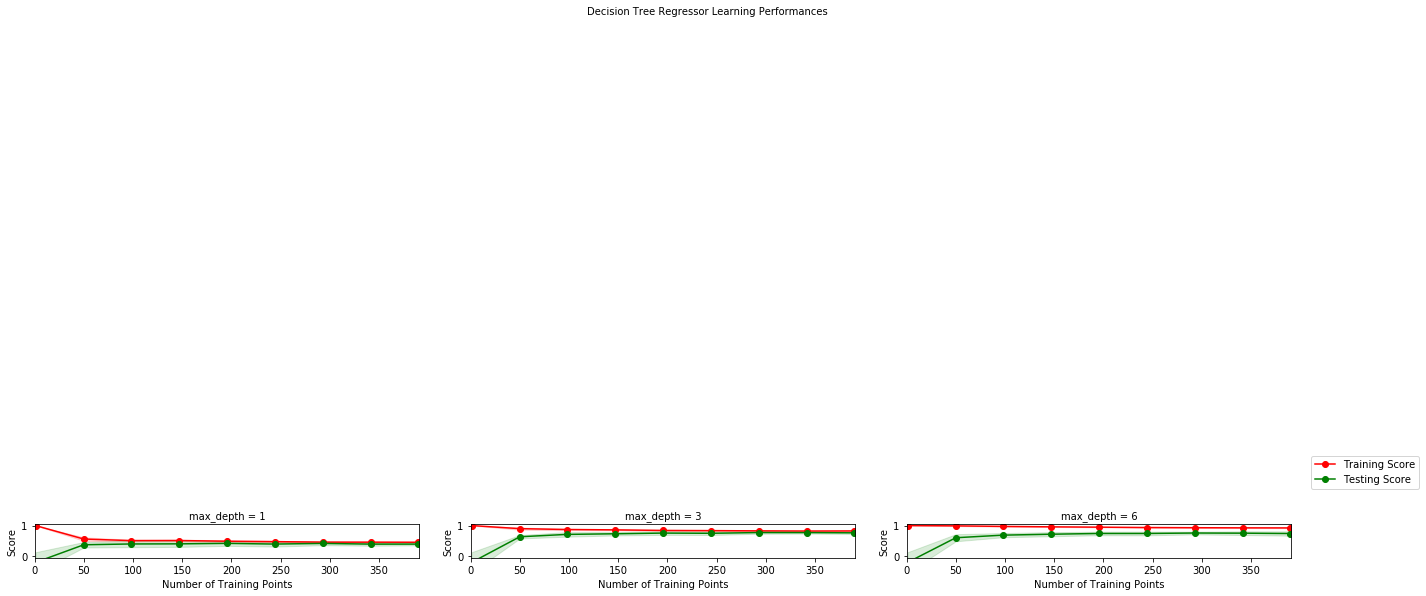

In [146]:
import matplotlib.pyplot as plt
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split   

cv = ShuffleSplit(features.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
train_sizes = np.rint(np.linspace(1, features.shape[0]*0.8 - 1, 9)).astype(int)
fig = plt.figure(figsize=(20,8))
# Create three different models based on max_depth
for k, depth in enumerate([1,3,6]):
        
        # Create a Decision tree regressor at max_depth = depth
    regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
    sizes, train_scores, test_scores = curves.learning_curve(regressor, features, price, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
    train_std = np.std(train_scores, axis = 1)
    train_mean = np.mean(train_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
    ax = fig.add_subplot(1, 3, k+1)
    ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
    ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
    ax.fill_between(sizes, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    ax.fill_between(sizes, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
    ax.set_title('max_depth = %s'%(depth),fontsize=10)
    ax.set_xlabel('Number of Training Points',fontsize=10)
    ax.set_ylabel('Score',fontsize=10)
    ax.set_xlim([0, features.shape[0]*0.8])
    ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 10, y = 1.03)
plt.savefig("depth.png")
fig.tight_layout()
fig.show()  
        

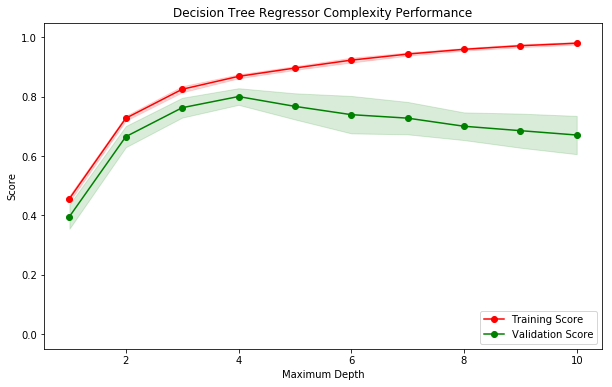

In [149]:
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(features.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(DecisionTreeRegressor(), features, price, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(10, 6))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.savefig("TV.png")
    plt.show()



In [75]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11)} # last value in range is exclusive

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [76]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


In [62]:
r2_score(reg.predict(X_test),y_test)

0.6579770142221746

In [77]:

# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $418,377.27
Predicted selling price for Client 2's home: $218,540.00
Predicted selling price for Client 3's home: $854,700.00


In [100]:
client_data1=[[5,17,15]]

In [104]:
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(features, price, \
            test_size = 0.2, random_state = k)
        
        # Fit the data
        reg = fit_model(X_train, y_train)
        
        # Make a prediction
        pred = reg.predict(client_data1)
        prices.append(pred)
        
        # Result
        #print("Trial {}: ${:,.2f}".format(k+1, pred))
        print(k+1,pred)

    # Display price range
    print("\nRange in prices: ",max(prices) - min(prices))

    #print(max(prices) - min(prices))

1 [391183.33333333]
2 [419700.]
3 [415800.]
4 [420622.22222222]
5 [418377.27272727]
6 [411931.57894737]
7 [399663.15789474]
8 [407232.]
9 [351577.6119403]
10 [413700.]

Range in prices:  [69044.61028192]


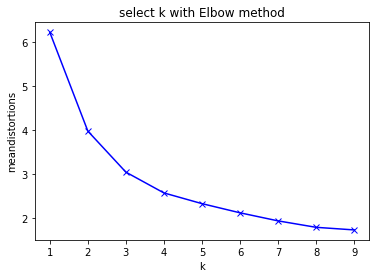

In [89]:
#-----
from sklearn import cluster
#y_reduced=df.poi

km2=cluster.KMeans(n_clusters=2).fit(features)
km3=cluster.KMeans(n_clusters=3).fit(features)
km4=cluster.KMeans(n_clusters=4).fit(features)

from scipy.spatial.distance import cdist
from sklearn import metrics
meandistortions=[]
K=range(1,10)
for k in K:
#    cluster.KMeans.fit(my_dataset2)
    kmeans=cluster.KMeans(n_clusters=k,random_state=0).fit(features)
    meandistortions.append(sum(np.min(cdist(features, kmeans.cluster_centers_, 'euclidean'), axis=1)) / features.shape[0])
plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('meandistortions')
plt.title('select k with Elbow method')
plt.savefig('K_Elbow.pdf')
plt.savefig('k_Elbow.png')
plt.show()

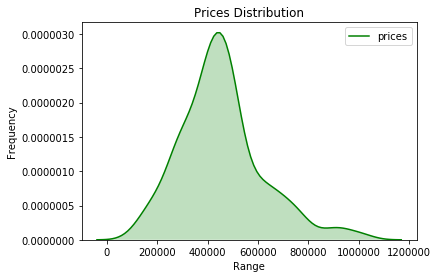

In [150]:
import seaborn as sns
ax=sns.kdeplot(price , color='g',shade=True, label='prices')
plt.title("Prices Distribution")
plt.xlabel("Range", fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.savefig("price.png")

In [112]:
from sklearn import cluster
km2=cluster.KMeans(n_clusters=2).fit(features)
c=km2.labels_
type(c)
#c
km2.cluster_centers_

array([[ 5.89512941, 20.84358824, 19.57705882],
       [ 6.42422884,  8.72749216, 17.95141066]])

In [121]:
new_data=data.copy()
new_data['label']=km2.labels_
new_data['prices']=price
new_data.shape
new_data.keys()

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV', 'label', 'prices'], dtype='object')

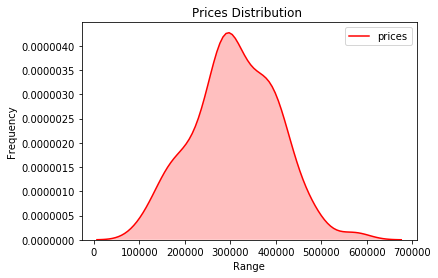

In [151]:
#plt.subplot(211)

ax=sns.kdeplot(new_data.loc[new_data.label==0,'prices'] , color='r',shade=True, label='prices')
plt.title("Prices Distribution ")
plt.xlabel("Range", fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.savefig('price0.png')






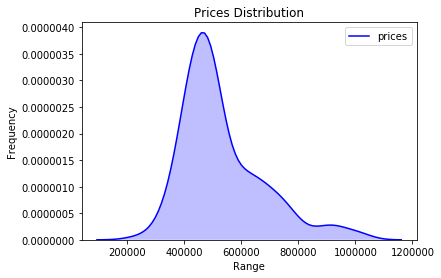

In [152]:
#plt.subplot(212)
ax=sns.kdeplot(new_data.loc[new_data.label==1,'prices'] , color='b',shade=True, label='prices')
plt.title("Prices Distribution")
plt.xlabel("Range", fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.savefig('price1.png')

In [131]:
new_data.loc[new_data.label==0].describe()

,RM,LSTAT,PTRATIO,MEDV,label,prices
count,170.000000,170.000000,170.000000,170.000000,170.0,170.000000
mean,5.895129,20.843588,19.577059,311430.000000,0.0,311430.000000
std,0.538569,5.295011,1.710498,91604.942149,0.0,91604.942149
min,4.138000,14.590000,14.700000,105000.000000,0.0,105000.000000
25%,5.607000,16.945000,20.100000,255150.000000,0.0,255150.000000
50%,5.927000,18.825000,20.200000,305550.000000,0.0,305550.000000
75%,6.222000,23.925000,20.200000,375375.000000,0.0,375375.000000
max,7.393000,37.970000,21.200000,577500.000000,0.0,577500.000000


In [133]:
new_data.loc[new_data.label==1].describe()

,RM,LSTAT,PTRATIO,MEDV,label,prices
count,319.000000,319.000000,319.000000,3.190000e+02,319.0,3.190000e+02
mean,6.424229,8.727492,17.951411,5.305034e+05,1.0,5.305034e+05
std,0.619661,3.297175,2.088977,1.440657e+05,0.0,1.440657e+05
min,3.561000,1.980000,12.600000,2.289000e+05,1.0,2.289000e+05
25%,6.022000,6.020000,16.600000,4.326000e+05,1.0,4.326000e+05
50%,6.345000,8.610000,18.300000,4.893000e+05,1.0,4.893000e+05
75%,6.760000,11.465000,19.600000,6.027000e+05,1.0,6.027000e+05
max,8.398000,15.120000,22.000000,1.024800e+06,1.0,1.024800e+06
